In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [23]:
t_step = 1
t_max = 10000
t = np.arange(0, t_max, t_step)

In [3]:
# 4-1
state = [1]

def reaction(n):
    return [2*n + 1, 3*n + 1]

for i in t:
    # print(i, state)
    state = reaction(state.pop(0)) + state
    state.sort()
    
print(state[0]) # 123931

123931


In [48]:
t_step = 1
t_max = 10000
t = np.arange(0, t_max, t_step)

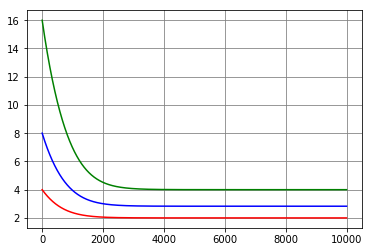

In [5]:
# 4-2-1

# Newton's method ...
def model(state, t):
    return [0, (state[0] / state[1] - state[1]) / 1000] # (state[0] / state[1] - state[1]) / 2 (t_max = 10 とかにする)

inits = [4.0, 8.0, 16.0]
colors = ['red', 'blue', 'green']

for i, init in enumerate(inits):
    current = init
    result = odeint(model, [init, current], t)
    plt.plot(t, result[:, 1], color=colors[i])

plt.grid(which='major',color='gray',linestyle='-')
plt.show()

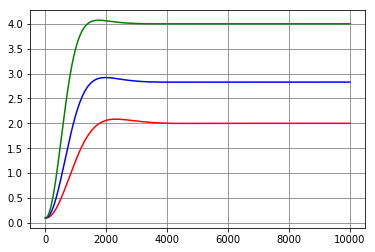

In [55]:
# 4-2-2
# A -> kp1 -> A + C
# C -> kp1 -> B + C
# C + B -> km1 -> B
# B -> km2 -> φ

kp1 = 1e-3
kp2 = 1e-3
km1 = 1e-3
km2 = 1e-3

def model(state, t):
    return [0, kp2*state[2]-km2*state[1], kp1*state[0]-km1*state[2]*state[1]]

inits = [[4.0, 0.1, 0.0], [8.0, 0.1, 0.0], [16.0, 0.1, 0.0]]
colors = ['red', 'blue', 'green']

for i, init in enumerate(inits):
    result = odeint(model, init, t)
    plt.plot(t, result[:, 1], color=colors[i])

plt.grid(which='major',color='gray',linestyle='-')
plt.show()